# About The Project

- We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.


- We have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. More the data better the model. In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, monitors, Home theater, router from different e-commerce websites.Basically, we need these columns- 1) reviews of the product. 2) rating of the product.

# About The Datasets

As far as the dataset is concerned, we have scraped it from amazon.in website for laptops review and rating. The dataset consists of 2 columns and 22000 rows.

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df=pd.read_csv('Rating_Data.csv') 
df.head()  #Checking the dataset

,Unnamed: 0,Unnamed: 0.1,Reviews:,Ratings:
0,0,0,Was excited for this laptop until it got deliv...,1.0
1,1,1,"As with the looks its very sleek, lightweight ...",5.0
2,2,2,powerful machine but a bit heavy ..,5.0
3,3,3,its is a perfect banlance of hardware and pric...,5.0
4,4,4,Updated review after 6months of usage:All the ...,5.0


In [3]:
# Structure of data
df.shape

(29535, 4)

We have 29535 rows and 4 columns.

In [4]:
# We will be removing the first column.

df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

### Data Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29535 entries, 0 to 29534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews:   29535 non-null  object 
 1   Ratings:   29535 non-null  float64
dtypes: float64(1), object(1)
memory usage: 461.6+ KB


In [6]:
# We will find the missing values first
df.isnull().sum()

Reviews:     0
Ratings:     0
dtype: int64

In [7]:
# Unique values present in Ratings: column
df['Ratings: '].value_counts()

5.0    13287
1.0    10434
4.0     3940
2.0     1500
3.0      374
Name: Ratings: , dtype: int64

In [8]:
# Describing data
df.describe() #Mean rating is 3.2

,Ratings:
count,29535.000000
mean,3.275808
std,1.822313
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


### Data Visualization

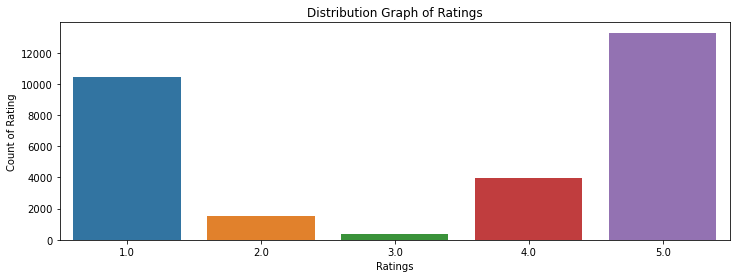

In [9]:
plt.figure(figsize=(12,4))    
sns.countplot(x='Ratings: ',data=df)
plt.title("Distribution Graph of Ratings")
plt.xlabel('Ratings')
plt.ylabel("Count of Rating")
plt.show()

#### Observation

People gave a rating of 5 in most of the reviews followed by 1 and 4.

### Applying NLP for Sentiment Analysis

In [10]:
# Loading essential libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
from wordcloud import WordCloud

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_text(df, df_column_name):
    
    # Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    # Replace email addresses with 'e-mail'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','e-mail')

    # Replace URLs with 'web-address'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','web-address')

    # Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phoneno.'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phoneno.')

    # Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    # Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [14]:
# Calling the class
clean_text(df, 'Reviews: ')
df['Reviews: '].head(3)

0    excited laptop got delivered today turns huge ...
1    looks sleek lightweight colour dark grey gives...
2                           powerful machine bit heavy
Name: Reviews: , dtype: object

In [15]:
# Using RegexpTokenizer for tokenizing the data
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Reviews: '] = df['Reviews: '].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Reviews:,Ratings:
0,"[excited, laptop, got, delivered, today, turns...",1.0
1,"[looks, sleek, lightweight, colour, dark, grey...",5.0
2,"[powerful, machine, bit, heavy]",5.0
3,"[perfect, banlance, hardware, price, post, ful...",5.0
4,"[updated, review, numbrmonths, usage, points, ...",5.0


In [16]:
!pip install gensim

In [17]:
# First Lemmatizing and then Stemming(Snowball Method) for reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
# Processing review with above Function
processed_review = []

for doc in df['Reviews: ']:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

29535


[['excit',
  'laptop',
  'get',
  'deliv',
  'today',
  'turn',
  'huge',
  'disappoint',
  'primarili',
  'due',
  'poor',
  'screen',
  'display',
  'compar',
  'cost',
  'product',
  'wherev',
  'superior',
  'display',
  'expect',
  'bare',
  'necessari',
  'resolut',
  'extrem',
  'poor',
  'come',
  'sharp',
  'alphabet',
  'number',
  'chart',
  'internet',
  'text',
  'etc',
  'take',
  'toll',
  'eye',
  'poor',
  'vision',
  'often',
  'feel',
  'eye',
  'focus',
  'alphabet',
  'even',
  'day',
  'wish',
  'return',
  'laptop',
  'compani',
  'polici',
  'permit',
  'pleas',
  'put',
  'money',
  'laptop',
  'better',
  'brand',
  'asus',
  'dell'],
 ['look',
  'sleek',
  'lightweight',
  'colour',
  'dark',
  'grey',
  'give',
  'classi',
  'look',
  'matt',
  'finish',
  'keyboard',
  'comfort',
  'type',
  'font',
  'print',
  'big',
  'good',
  'even',
  'keep',
  'laptop',
  'distant',
  'two',
  'light',
  'set',
  'backlight',
  'keyboard',
  'seem',
  'pretti',
  'us

In [20]:
df['cleansed review: ']=processed_review  #Assigning this to the dataframe
df.head()

,Reviews:,Ratings:,cleansed review:
0,"[excited, laptop, got, delivered, today, turns...",1.0,"[excit, laptop, get, deliv, today, turn, huge,..."
1,"[looks, sleek, lightweight, colour, dark, grey...",5.0,"[look, sleek, lightweight, colour, dark, grey,..."
2,"[powerful, machine, bit, heavy]",5.0,"[power, machin, bite, heavi]"
3,"[perfect, banlance, hardware, price, post, ful...",5.0,"[perfect, banlanc, hardwar, price, post, full,..."
4,"[updated, review, numbrmonths, usage, points, ...",5.0,"[updat, review, numbrmonth, usag, point, menti..."


In [21]:
df['Reviews: '] = df['cleansed review: '].apply(lambda x:' '.join(y for y in x))
df.head()

,Reviews:,Ratings:,cleansed review:
0,excit laptop get deliv today turn huge disappo...,1.0,"[excit, laptop, get, deliv, today, turn, huge,..."
1,look sleek lightweight colour dark grey give c...,5.0,"[look, sleek, lightweight, colour, dark, grey,..."
2,power machin bite heavi,5.0,"[power, machin, bite, heavi]"
3,perfect banlanc hardwar price post full review...,5.0,"[perfect, banlanc, hardwar, price, post, full,..."
4,updat review numbrmonth usag point mention buy...,5.0,"[updat, review, numbrmonth, usag, point, menti..."


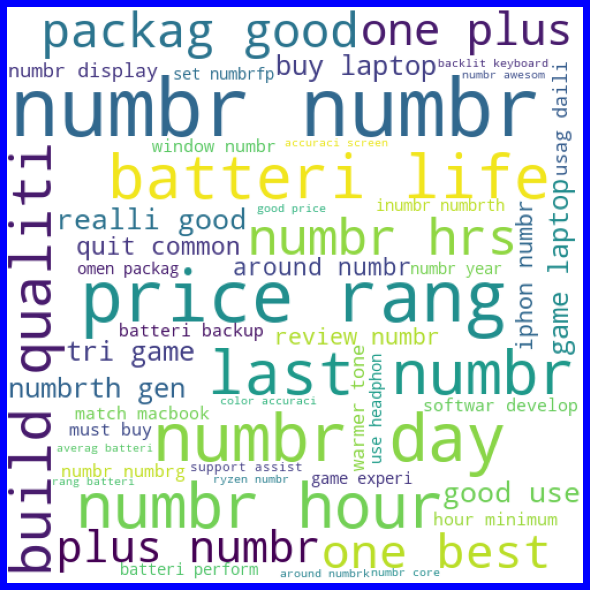

In [22]:
# Getting sense of words in Rating 5
one = df['Reviews: '][df['Ratings: ']==5.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=50).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

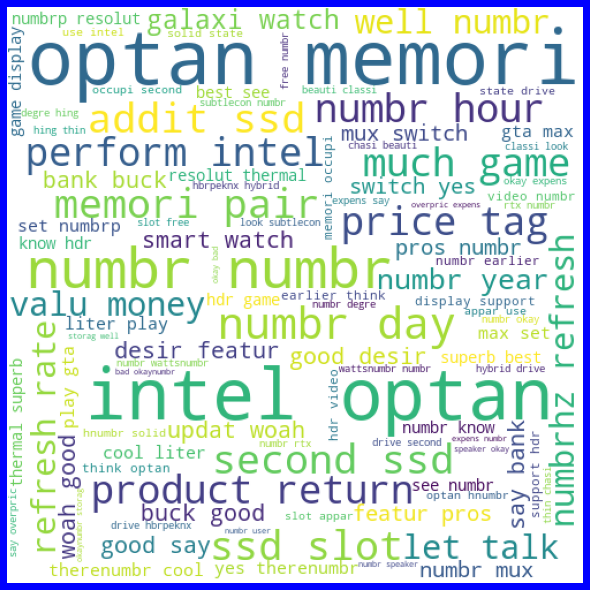

In [25]:
# Getting sense of words in Rating 4
one = df['Reviews: '][df['Ratings: ']==4.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=100).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

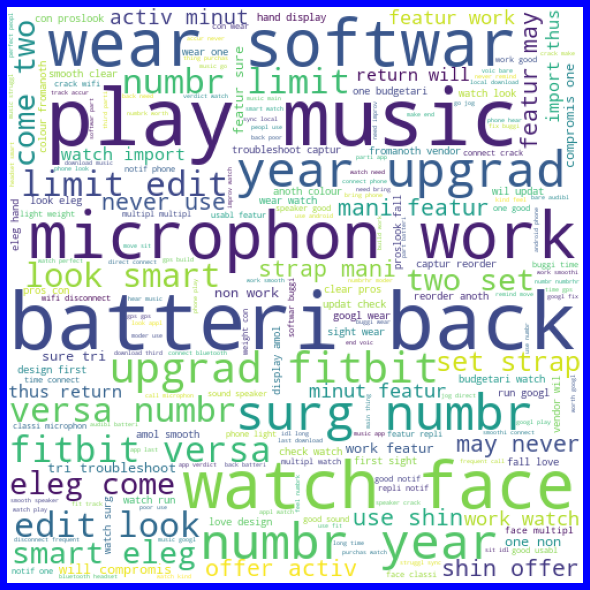

In [24]:
# Getting sense of words in Rating 3
one = df['Reviews: '][df['Ratings: ']==3.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

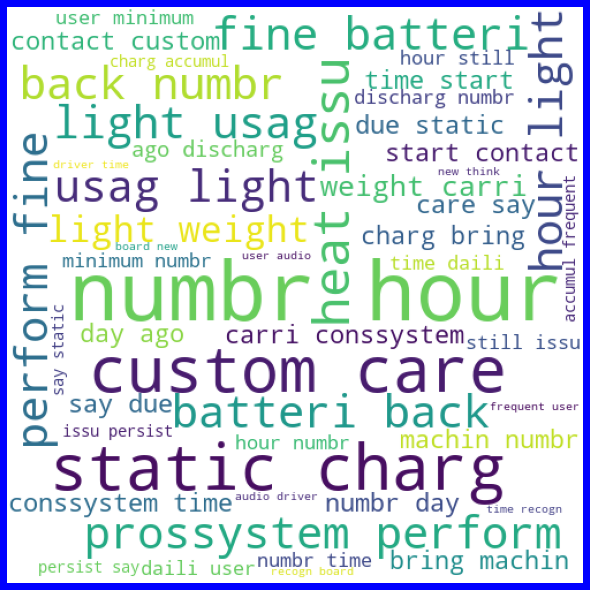

In [31]:
# Getting sense of words in Rating 2
one = df['Reviews: '][df['Ratings: ']==2.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=50).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

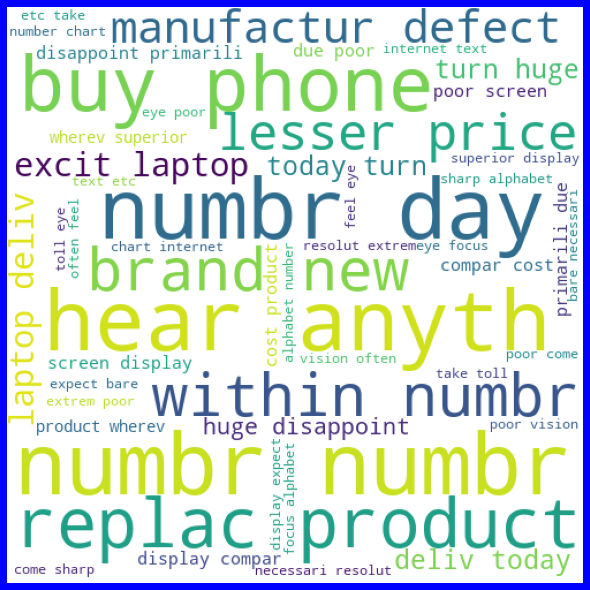

In [32]:
# Getting sense of words in Rating 1
one = df['Reviews: '][df['Ratings: ']==1.0]

one_cloud = WordCloud(width=500,height=500,background_color='white',max_words=50).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Observation

1. People when rating a product higher talk about their build quality, gaming prowess, light weight and ssd.


2. When these features are missing in a laptop they tend to rate the product lower.

### Feature Extraction

In [33]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
ft = tf.fit_transform(df['Reviews: '])
x=ft
y=df[['Ratings: ']]

x.shape

(29535, 1463)

In [34]:
y.shape

(29535, 1)

### Model Building and Training¶

In [35]:
# Importing Essential Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
# Finding the best random state

max_a_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=LogisticRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    accu=accuracy_score(y_test,y_pred)
    if accu>max_a_score:
        max_a_score=accu
        final_r_state=r_state
print("Max accuracy score corresponding to",final_r_state,"is",max_a_score)

Max accuracy score corresponding to 47 is 0.9706818181818182


Max accuracy score corresponding to 47 is 0.9706818181818182


**We got accuracy score of 97 on r_state 47.**

In [37]:
# Coverting to train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47)

In [38]:
model = [LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Cross Val Score:',cross_val_score(m,x,y,cv=5,scoring='accuracy').mean())
    print('Classification Report:',classification_report(y_test,predm))
    print("Confusion Matrix:",confusion_matrix(y_test,predm))
    print('*************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.9616477272727273
Scores:
Accuracy Score: 0.9706818181818182
Cross Val Score: 0.6017727272727273
Classification Report:               precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      1179
         2.0       0.85      0.88      0.87       204
         3.0       0.99      0.93      0.96       395
         4.0       0.98      0.97      0.97       872
         5.0       0.99      0.98      0.98      1750

    accuracy                           0.97      4400
   macro avg       0.95      0.95      0.95      4400
weighted avg       0.97      0.97      0.97      4400

Confusion Matrix: [[1167    9    1    2    0]
 [  11  180    2    9    2]
 [   9   12  369    5    0]
 [   0   11    1  842   18]
 [  37    0    0    0 1713]]
*************************************************************


Score of MultinomialNB() is: 0.941875
Scores:
Accuracy Score: 0.9513636363636364
Cross Val Score: 0.5637272727272726
Classification R

#### Observation:

We are getting best scores and cross-validation scores using Logistic regression and Random Forest Classifier but we will be using RFC for building our model because of its better scores.


Now, we will improve their accuracy using Hyper-parameter tuning.¶

In [39]:
# Hyper-Paramter Tuning(using GridCVSearch)
parameters={'n_estimators':[1,10,100]}

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier(random_state=47)   
gb=GridSearchCV(gb,parameters,cv=3,scoring='accuracy')
gb.fit(x_train,y_train)
print(gb.best_params_)    
print(gb.best_score_)

{'n_estimators': 100}
0.9563068695555201


In [40]:
gb=GradientBoostingClassifier(random_state=47,n_estimators=100)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gb,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  96.77272727272728
Cross validation score:  53.786441541030946
Classification report: 

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      1179
         2.0       0.93      0.79      0.85       204
         3.0       0.99      0.93      0.96       395
         4.0       0.98      0.97      0.97       872
         5.0       0.99      0.98      0.98      1750

    accuracy                           0.97      4400
   macro avg       0.96      0.93      0.95      4400
weighted avg       0.97      0.97      0.97      4400

Confusion matrix: 

[[1168    3    1    2    5]
 [  30  161    2    9    2]
 [  17    3  369    5    1]
 [   5    6    1  842   18]
 [  32    0    0    0 1718]]


### Saving the Model(Gradient boosting algorithm)

In [41]:
# Saving the best Ridge model
import joblib
joblib.dump(gb,'Rating_Pred.pkl')

['Rating_Pred.pkl']